In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['figure.dpi'] = 200

In [34]:
df = pd.read_csv("cleaned_data.csv")
df["Date mutation"] = pd.to_datetime(df["Date mutation"], dayfirst=True)
df = df.set_index("Date mutation").sort_index()
sample = df.sample(1000).sort_index() # Work with sample to avoid long loading times.
display(df)
display(df.isna().sum())
display(df.dtypes)

,Valeur fonciere,Code voie,Code postal,Code departement,Code commune,No plan,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Nombre de lots
Date mutation,,,,,,,,,,,,,,,,
2018-01-02,149500.0,Voie,37520.0,37,195,395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2018-01-02,200.0,Lieux dit,11350.0,11,113,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2018-01-02,1358.0,Lieux dit,59176.0,59,390,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2018-01-02,140000.0,Voie,29300.0,29,233,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2018-01-02,3700.0,Lieux dit,54480.0,54,421,123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,2000000.0,Voie,34000.0,34,172,349,317.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-06-30,5000.0,Lieux dit,2160.0,2,439,207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2022-06-30,2200000.0,Voie,69140.0,69,286,85,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


Valeur fonciere               0
Code voie                     0
Code postal                   0
Code departement              0
Code commune                  0
No plan                       0
1er lot                       0
Surface Carrez du 1er lot     0
2eme lot                      0
Surface Carrez du 2eme lot    0
3eme lot                      0
Surface Carrez du 3eme lot    0
4eme lot                      0
Surface Carrez du 4eme lot    0
5eme lot                      0
Nombre de lots                0
dtype: int64

Valeur fonciere               float64
Code voie                      object
Code postal                   float64
Code departement               object
Code commune                    int64
No plan                         int64
1er lot                       float64
Surface Carrez du 1er lot     float64
2eme lot                      float64
Surface Carrez du 2eme lot    float64
3eme lot                      float64
Surface Carrez du 3eme lot    float64
4eme lot                      float64
Surface Carrez du 4eme lot    float64
5eme lot                      float64
Nombre de lots                  int64
dtype: object

Text(0.5, 1.0, 'Distribution des Valeur foncières')

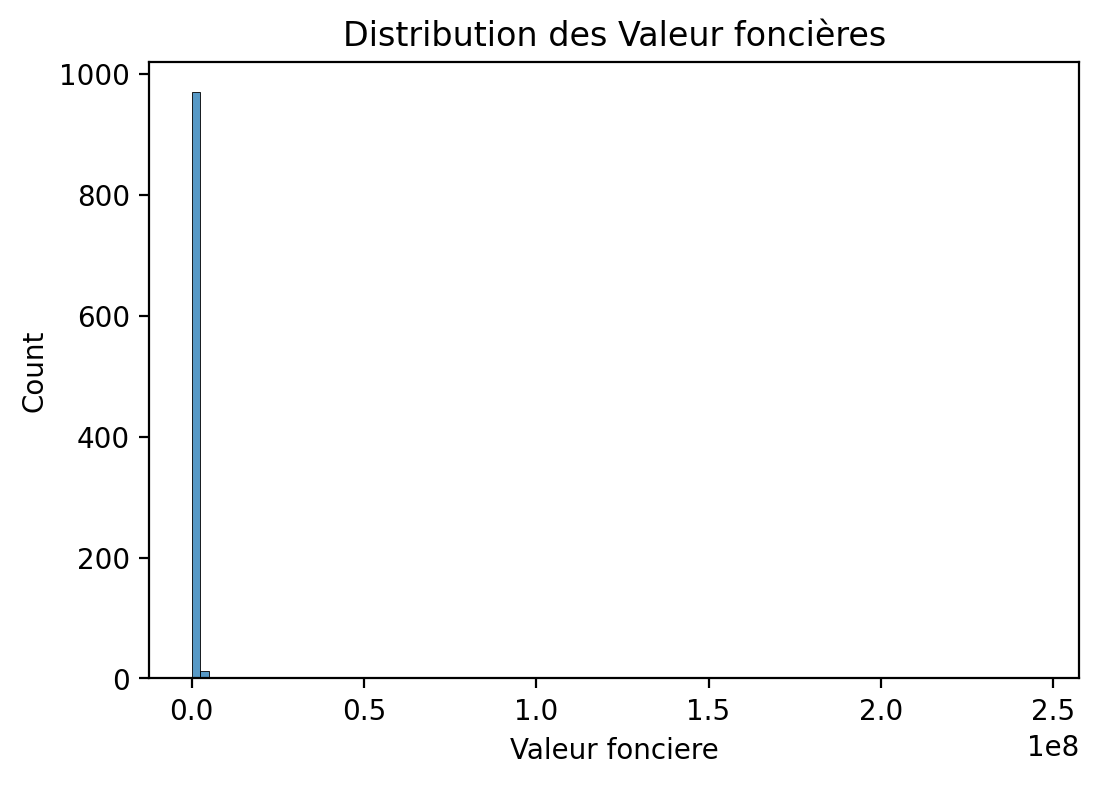

In [35]:
# Distribution of Prices
sns.histplot(sample, x="Valeur fonciere", bins=100)
plt.title("Distribution des Valeur foncières")

Text(0.5, 1.0, 'Valeurs foncières (sans les 10% les plus extrêmes)')

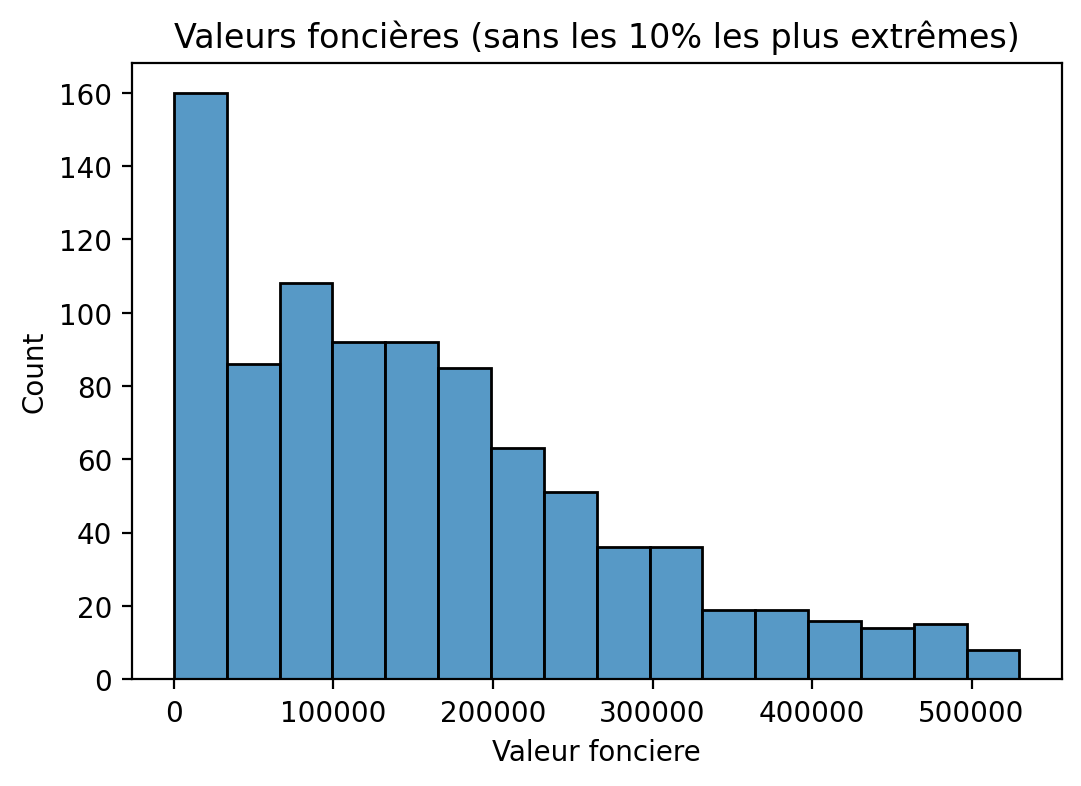

In [36]:
without_outliers = sample["Valeur fonciere"][sample["Valeur fonciere"].between(sample["Valeur fonciere"].quantile(0), sample["Valeur fonciere"].quantile(.9))] # without outliers
sns.histplot(without_outliers)
plt.title("Valeurs foncières (sans les 10% les plus extrêmes)")

Text(0.5, 1.0, 'Valeur foncière moyenne (Mois glissant)')

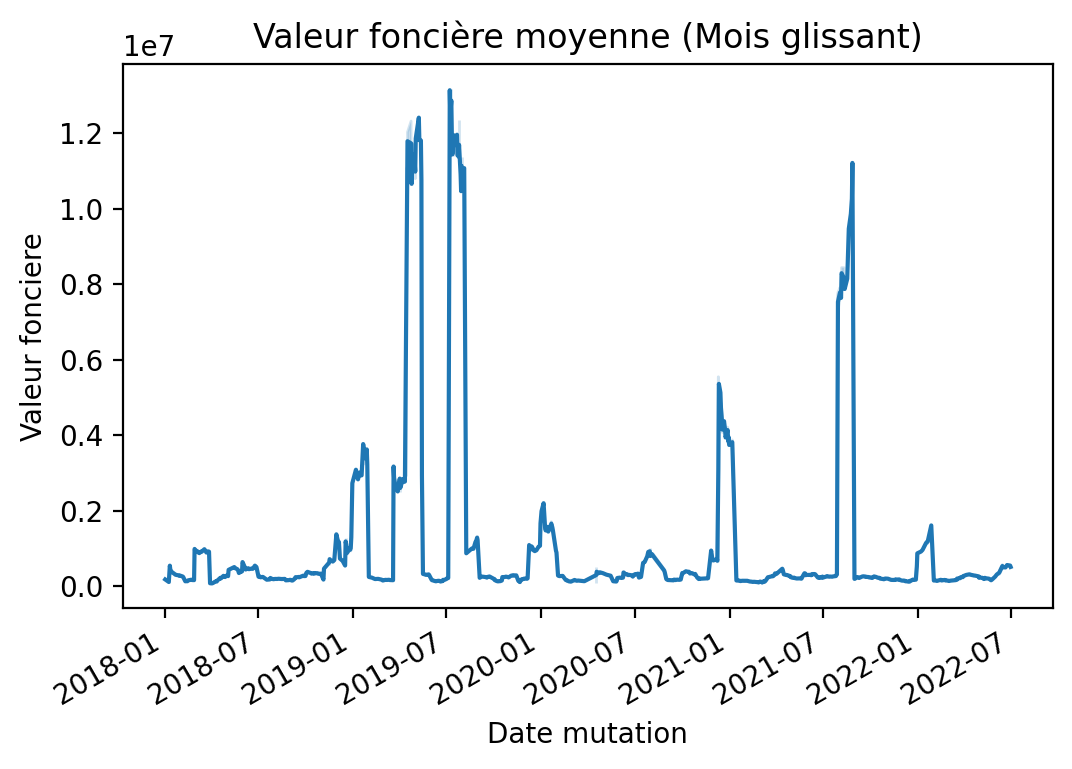

In [43]:
monthly_mean = sample["Valeur fonciere"].rolling("30d").mean().dropna()
sns.lineplot(x=monthly_mean.index, y=monthly_mean)
plt.gcf().autofmt_xdate()
plt.title("Valeur foncière moyenne (Mois glissant)")

Text(0.5, 1.0, 'Valeur foncière moyenne (Mois glissant & Sans les 10% les plus extrêmes)')

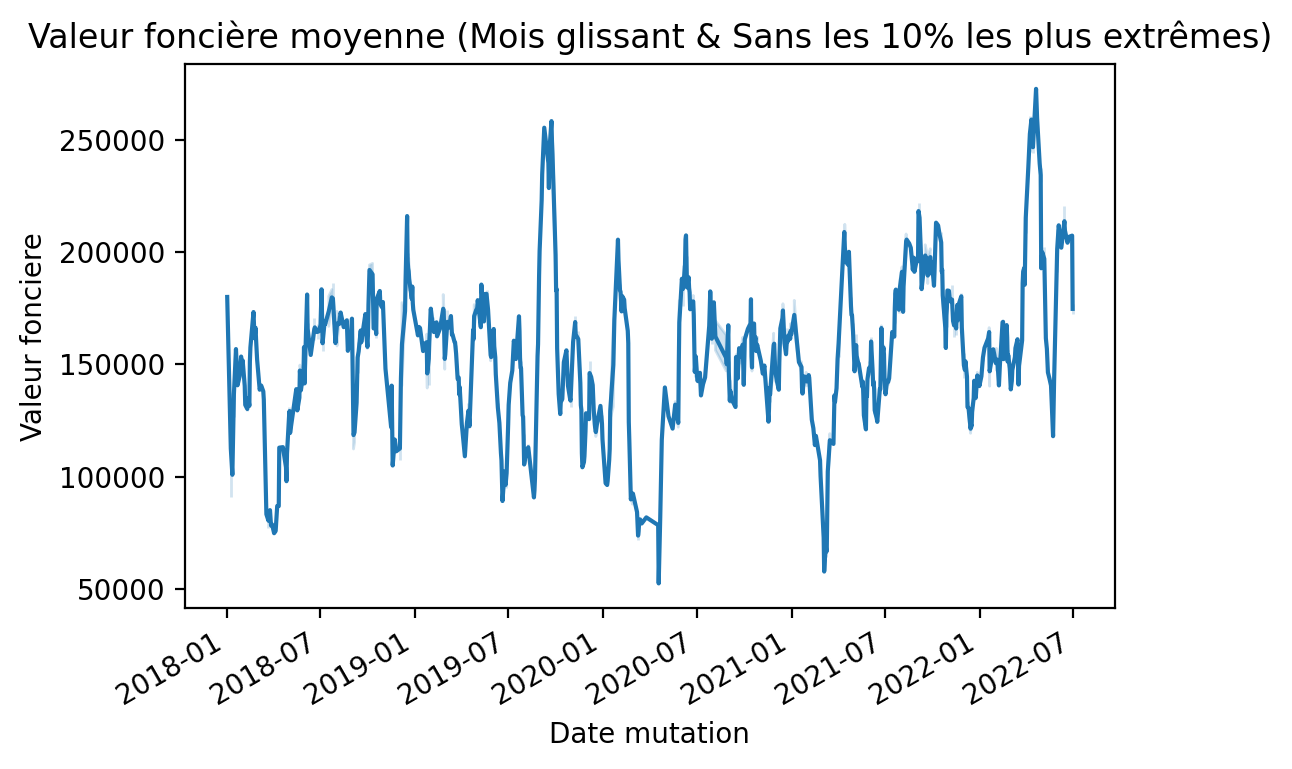

In [44]:
monthly_mean = without_outliers.rolling("30d").mean().dropna()
sns.lineplot(x=monthly_mean.index, y=monthly_mean)
plt.gcf().autofmt_xdate()
plt.title("Valeur foncière moyenne (Mois glissant & Sans les 10% les plus extrêmes)")

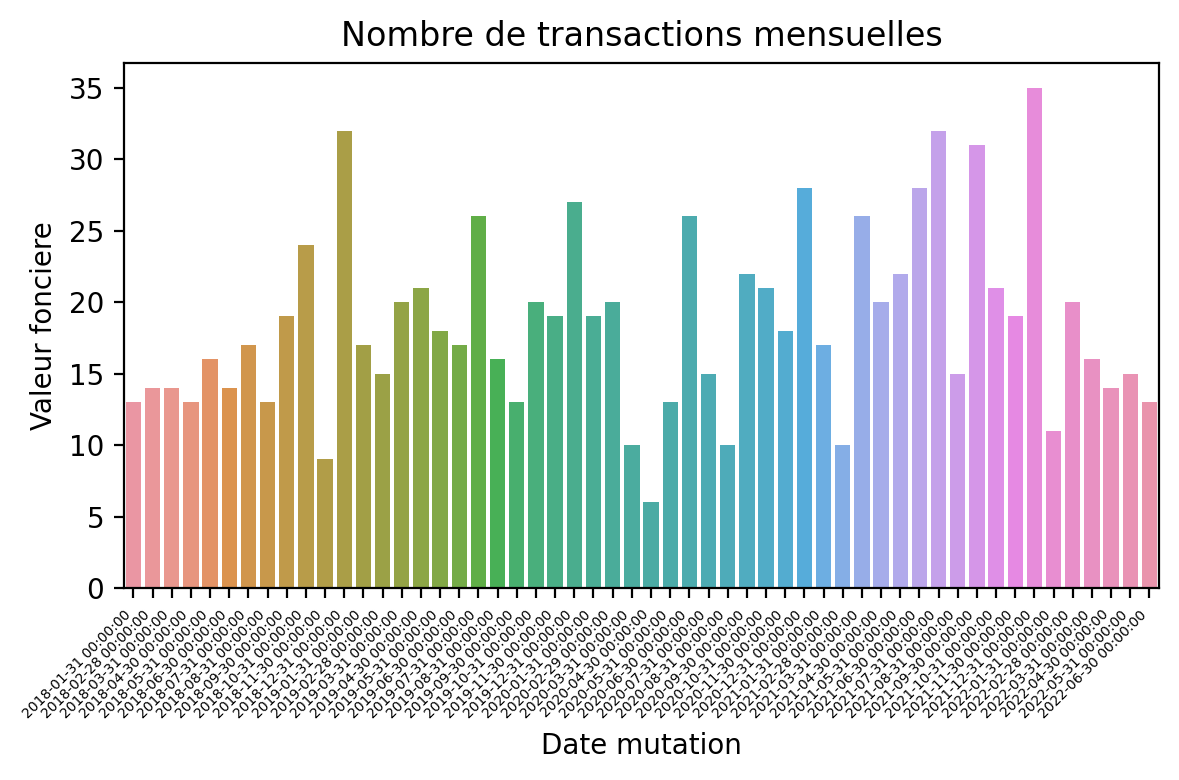

In [66]:
nbr_monthly_transactions = sample["Valeur fonciere"].resample("M").count()
sns.barplot(x=nbr_monthly_transactions.index, y=nbr_monthly_transactions)
plt.title("Nombre de transactions mensuelles")
plt.gcf().autofmt_xdate()
plt.xticks(rotation=45, fontsize=5)
plt.tight_layout()

/var/folders/fj/8pmdh2z120lbtvdmmc2407th0000gn/T/ipykernel_74754/3808317480.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price_by_departement = sample.groupby(by="Code departement").mean()["Valeur fonciere"]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75]),
 [Text(0, 0, '1'),
  Text(1, 0, '10'),
  Text(2, 0, '11'),
  Text(3, 0, '12'),
  Text(4, 0, '14'),
  Text(5, 0, '15'),
  Text(6, 0, '16'),
  Text(7, 0, '17'),
  Text(8, 0, '19'),
  Text(9, 0, '2'),
  Text(10, 0, '21'),
  Text(11, 0, '22'),
  Text(12, 0, '23'),
  Text(13, 0, '24'),
  Text(14, 0, '25'),
  Text(15, 0, '26'),
  Text(16, 0, '27'),
  Text(17, 0, '28'),
  Text(18, 0, '29'),
  Text(19, 0, '2B'),
  Text(20, 0, '3'),
  Text(21, 0, '30'),
  Text(22, 0, '32'),
  Text(23, 0, '34'),
  Text(24, 0, '35'),
  Text(25, 0, '36'),
  Text(26, 0, '37'),
  Text(27, 0, '38'),
  Text(28, 0, '4'),
  Text(29, 0, '40'),
  Text(30, 0, '41'),
  Text(31, 0, '42

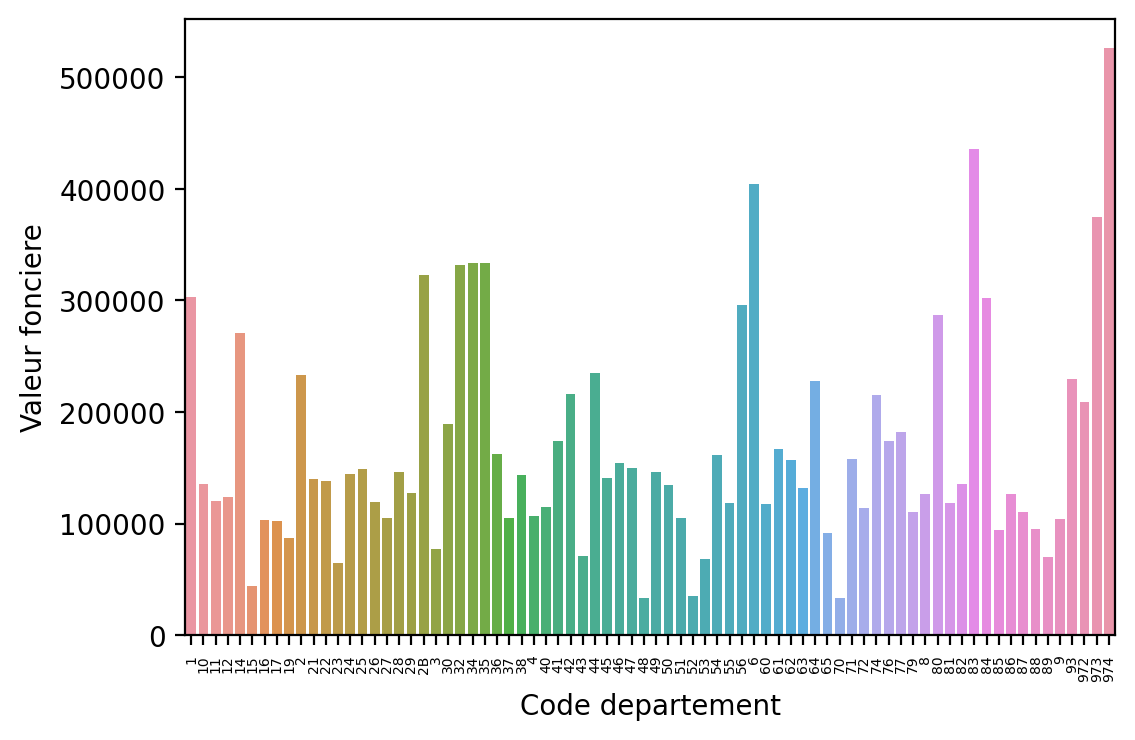

In [78]:
price_by_departement = sample.groupby(by="Code departement").mean()["Valeur fonciere"]
mask_80 = price_by_departement < price_by_departement.quantile(0.8)
sns.barplot(x=price_by_departement[mask_80].index, y=price_by_departement[mask_80])
plt.xticks(rotation=90, fontsize=5)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '13'),
  Text(1, 0, '18'),
  Text(2, 0, '2A'),
  Text(3, 0, '31'),
  Text(4, 0, '33'),
  Text(5, 0, '39'),
  Text(6, 0, '58'),
  Text(7, 0, '59'),
  Text(8, 0, '66'),
  Text(9, 0, '69'),
  Text(10, 0, '7'),
  Text(11, 0, '73'),
  Text(12, 0, '75'),
  Text(13, 0, '78'),
  Text(14, 0, '91'),
  Text(15, 0, '92'),
  Text(16, 0, '94'),
  Text(17, 0, '95'),
  Text(18, 0, '971')])

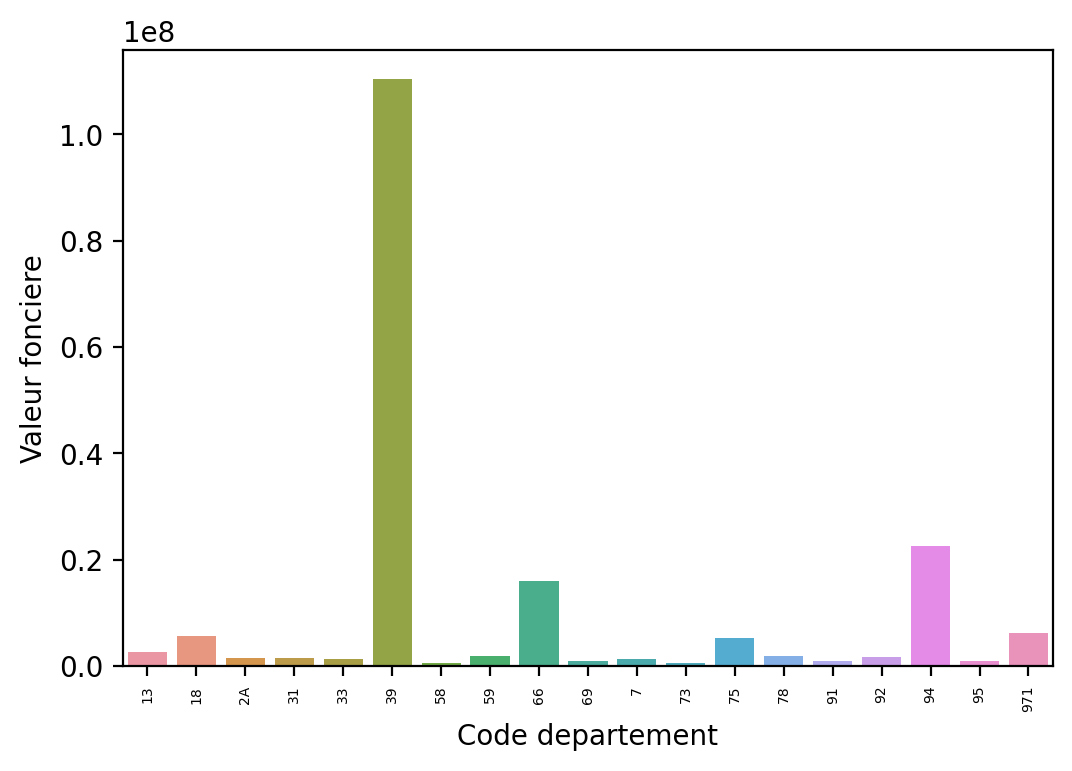

In [79]:
mask_20 = price_by_departement > price_by_departement.quantile(0.8)
sns.barplot(x=price_by_departement[mask_20].index, y=price_by_departement[mask_20])
plt.xticks(rotation=90, fontsize=5)